In [596]:
import pandas
import numpy
from bs4 import BeautifulSoup
import unicodedata
import sys
import re
import nltk
from nltk.corpus import stopwords
import pymorphy2
from collections import Counter
import matplotlib.pyplot as plt

In [427]:
data = pandas.read_csv('Sirius.csv', header = None, sep='\t', comment ='#').values

In [428]:
text_to_do = numpy.array_str(data)

In [429]:
#Привести все слова к нижнему регистру;
text_to_do = text_to_do.lower()

In [430]:
# удалить нерелевантные слова (ссылки, слова на английском, и. т .д);
# 1. Удаление элементов html с помощью beautifulSoup
soup = BeautifulSoup(text_to_do, 'html')
text_to_do = soup.get_text()
# 2. Удаление ссылок по http
text_to_do = re.sub(r'http\S+', '', text_to_do)
text_to_do = re.sub(r'www\S+', '', text_to_do)

In [431]:
# 3. Удаление английских букв, конца строки и 
#  удаленение конца строки и цифр
text_to_do = re.sub(r'\n', '', text_to_do)
text_to_do = re.sub(r'[0-9]', '', text_to_do)
text_to_do = re.sub(r'[a-z]', '', text_to_do)
#text_to_do

In [432]:
# удалить пунктуацию
# 1. Создаем словарь знаков препинания.
# Заменяем на 32 - пробел, так как встречаются слова, разделенные только пунктуацией.
punctuation = dict.fromkeys( [i for i in range(sys.maxunicode) if unicodedata.category(chr(i)).startswith('P')], 32)
# 2. Удаляем эти знаки препинания в строке.
text_to_do = text_to_do.translate(punctuation)
# 3. Удаление лишних пробелов.
text_to_do = re.sub(' +',' ', text_to_do)
text_to_do = text_to_do.strip()

In [433]:
# Лексемизация текста.
list_words = text_to_do.split(' ')

In [434]:
 # Удаление стоп-слов
nltk.download('stopwords')
stop_words = stopwords.words('russian')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Маша\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [435]:
list_words = [word for word in list_words if word not in stop_words]

In [456]:
#Лемматезация слов
morph = pymorphy2.MorphAnalyzer()
new_list_words = [morph.parse(word)[0].normal_form for word in list_words]

In [510]:
# Отсортировать слова по частоте их употребления и выделить топ 100 слов
x = Counter(new_list_words)
x100 = x.most_common(100)

In [544]:
# Преобразование в датафрейм
answer = pandas.DataFrame.from_dict(x100)

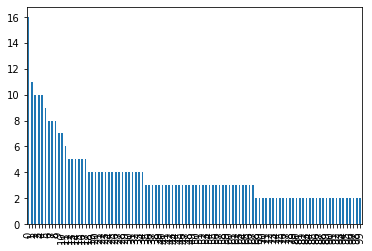

In [582]:
axes = answer.plot.bar(legend=False )